In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

In [16]:
max_features = 20000
# 20000번째로 많이 사용되는 단어까지만 데이터셋에 포함시킵니다. (즉 단어의 종류도 20000개라는 뜻입니다.)
text_max_words = 200
# 리뷰 당 단어 수를 200개로 제한합니다. 넘치는 단어들은 잘라냅니다.

In [17]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# x_* 변수는 영화 리뷰를 담는 리스트이고
# 각각의 리뷰는 단어들의 리스트입니다.
# y_* 변수는 영화 리뷰의 긍정 부정을 나타내는 값들의 리스트입니다.
# *_train 변수는 훈련 셋이고 *_test 셋은 테스트 셋 입니다
print(len(x_train), len(y_train), len(x_test), len(y_test))
# num_words 가 20000이라고 데이터셋이 20000개라는 뜻은 아닙니다.
# 데이터셋은 각각 25000개 입니다.
print(y_train)

25000 25000 25000 25000
[1 0 0 ... 0 1 0]


In [18]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# 훈련 셋은 데이터 셋에서 20000개 까지,
# 검증(validation) 셋은 데이터 셋에서 5000개 까지로 나눕니다.
print(len(x_train), len(y_train), len(x_val), len(y_val))

for review in x_train:
    print(len(review))
# 현재는 각각의 리뷰의 단어 수가 모두 다릅니다.

20000 20000 5000 5000
218
189
141
550
147
43
123
562
233
130
450
99
117
238
109
129
163
752
212
177
129
140
256
888
93
142
220
193
171
221
174
647
233
162
597
234
51
336
139
231
704
142
861
132
122
570
55
214
103
186
113
169
469
138
302
766
351
146
59
206
107
152
186
431
147
684
383
324
252
263
787
211
314
118
390
132
710
306
167
115
95
158
156
82
502
314
190
174
60
145
214
659
408
515
461
202
238
170
107
171
158
145
790
258
287
67
123
975
775
236
195
274
214
91
1038
815
183
206
50
118
147
141
60
56
439
439
213
144
533
303
203
563
129
153
55
92
174
187
183
165
78
198
156
223
127
61
362
84
57
176
159
57
159
165
213
194
149
130
203
19
98
466
525
130
322
153
408
215
472
143
136
354
260
319
125
209
282
810
142
240
148
198
193
123
128
103
479
345
263
165
205
333
184
92
177
335
120
121
259
180
160
114
59
343
513
133
206
152
206
572
153
139
151
129
129
196
433
199
140
311
151
200
584
127
513
781
932
526
161
646
135
52
267
174
185
219
81
219
131
153
270
644
155
546
284
85
293
155
358
45
231
12

162
121
186
133
633
136
186
34
125
107
143
143
325
949
207
41
194
607
641
497
91
201
553
174
306
123
514
238
171
168
751
518
286
137
421
457
118
542
116
69
348
412
241
352
139
53
487
356
85
575
615
157
86
247
625
696
236
253
361
123
201
293
239
167
53
64
364
103
431
475
47
352
106
158
149
162
773
115
137
101
148
222
175
227
164
193
121
147
501
300
208
276
277
131
134
371
40
391
403
74
146
912
135
266
163
149
100
522
89
190
140
428
99
365
98
525
96
127
117
160
351
118
126
247
284
598
211
130
241
135
368
323
220
79
153
177
301
103
115
139
263
314
121
140
388
194
484
162
217
324
168
154
748
515
186
287
287
255
512
331
80
203
138
192
578
468
361
117
275
156
285
138
122
203
135
153
160
329
161
229
117
65
430
143
606
143
118
232
221
335
155
206
121
136
295
221
674
506
120
166
111
182
161
116
355
168
143
292
320
543
610
160
390
242
236
56
957
264
69
180
154
173
563
173
750
658
137
303
101
127
164
135
783
61
195
287
679
172
110
154
111
473
245
484
263
258
280
186
108
137
250
73
137
119
91
344


279
159
165
56
152
488
374
80
126
133
499
242
229
219
222
906
120
426
402
408
99
159
120
130
540
524
262
113
153
172
205
137
198
912
236
129
49
125
358
57
580
83
122
102
270
568
129
183
116
139
124
806
123
318
394
100
561
270
285
141
37
117
126
141
259
187
529
256
144
129
992
107
167
379
146
128
50
54
227
281
195
96
122
158
210
128
36
120
167
72
140
145
109
494
293
743
116
123
74
135
86
303
231
360
449
47
132
284
207
159
131
253
404
308
366
116
57
508
182
208
705
250
346
301
246
349
124
168
575
115
139
326
114
257
161
1016
120
237
133
127
68
661
475
184
360
148
132
171
250
223
86
265
123
351
153
145
224
157
166
133
130
52
55
147
136
439
135
604
262
297
117
585
113
183
220
251
201
215
405
185
221
376
224
175
151
135
127
86
169
114
110
216
364
62
26
161
133
134
839
201
328
57
189
83
112
227
151
139
127
203
215
295
266
145
334
123
136
243
155
566
409
118
405
161
260
105
154
1010
268
359
166
219
42
262
406
177
373
203
325
123
227
121
479
146
201
160
631
199
878
115
210
395
124
141
262
151


44
47
156
218
130
59
407
153
146
217
84
271
181
320
146
113
293
181
65
113
163
458
300
223
592
392
74
157
85
414
121
169
365
235
232
360
198
136
150
351
66
240
366
364
37
155
162
469
163
129
122
194
202
815
368
199
53
133
167
964
245
363
122
170
203
239
214
124
426
107
536
127
329
218
179
209
125
140
178
58
117
143
110
141
433
185
112
205
132
159
496
139
217
166
498
356
275
625
56
211
287
178
985
48
58
158
294
668
186
121
125
251
628
352
210
226
345
133
106
390
134
110
168
201
355
213
157
311
367
163
161
153
162
337
249
165
78
80
127
437
160
355
159
137
339
95
745
136
212
195
263
154
155
546
139
75
76
62
186
292
148
171
242
150
142
64
130
170
128
125
411
102
470
36
233
379
262
56
115
61
119
160
147
86
156
260
131
108
184
117
119
185
181
127
132
167
210
141
684
449
394
371
254
216
119
70
380
357
125
392
125
43
700
150
209
97
195
118
134
359
121
200
866
67
50
119
252
203
134
80
96
501
277
609
121
254
230
149
173
283
270
336
74
203
113
169
113
43
157
54
287
218
322
129
200
299
128
174
168

166
223
144
298
567
160
176
213
182
126
202
442
281
469
453
75
105
201
248
139
348
679
140
159
316
95
151
181
971
307
394
149
113
63
631
100
205
503
306
95
141
119
222
171
116
277
1005
12
553
164
118
149
672
184
53
124
328
170
234
268
143
67
154
476
984
361
49
56
828
168
163
413
146
132
217
129
236
214
104
355
194
267
207
152
168
52
374
112
362
828
435
188
122
1030
486
143
528
158
203
270
205
144
560
166
69
155
66
110
114
251
335
238
444
143
552
864
154
108
146
60
234
165
471
70
383
48
484
50
94
255
144
511
159
138
230
131
196
130
82
154
67
119
371
139
484
424
343
415
189
358
254
481
126
171
229
165
370
88
193
155
246
221
208
143
113
219
165
157
160
185
149
200
739
221
144
79
68
124
136
82
345
108
128
166
192
59
93
357
173
380
739
207
69
132
314
153
135
131
78
272
179
127
155
133
201
350
119
167
310
298
376
395
149
42
146
156
151
606
187
138
60
145
221
69
100
201
591
182
104
108
129
120
40
142
260
131
183
310
127
286
88
86
160
265
139
141
222
146
190
807
212
64
106
89
228
109
47
609
21

161
59
223
81
116
305
485
300
307
449
245
154
449
155
111
354
278
262
158
378
104
187
138
122
196
151
123
410
254
373
191
128
421
53
131
107
290
183
170
442
321
147
176
177
255
316
59
207
135
126
92
140
924
200
212
137
114
210
254
156
308
123
236
47
287
396
291
66
274
158
133
289
136
77
153
191
246
142
53
49
114
400
155
154
404
140
208
177
155
126
634
672
146
289
114
117
183
63
80
565
337
171
173
83
297
77
219
119
243
696
202
140
251
120
166
62
168
127
160
93
446
174
228
236
138
494
175
137
974
122
237
212
154
377
439
215
113
112
171
933
193
208
128
171
433
281
100
155
165
188
123
223
179
271
97
206
430
202
176
136
472
70
105
387
309
333
635
192
50
427
115
147
301
75
287
184
158
59
159
276
274
291
260
110
127
240
212
122
159
143
62
115
243
126
435
113
168
282
192
300
466
144
145
602
121
334
121
53
189
314
113
254
126
21
364
776
46
217
150
116
181
633
365
139
184
460
349
350
777
134
153
148
64
117
74
132
155
324
293
236
141
473
733
175
117
136
363
86
246
52
158
140
278
123
598
89
240
42

279
278
313
116
142
671
110
34
68
96
152
61
173
167
119
325
195
250
257
155
186
140
274
220
54
130
396
920
165
315
175
260
414
105
321
968
397
65
108
115
124
141
492
443
399
110
152
137
258
183
320
132
123
66
176
150
123
107
297
122
132
140
172
217
263
309
199
740
237
122
67
198
53
379
153
263
155
146
202
158
155
165
128
178
379
477
140
407
135
103
201
339
147
161
135
551
85
99
296
257
152
140
502
248
130
373
212
163
244
152
512
190
206
234
156
184
298
237
427
203
171
152
86
219
141
152
590
220
160
430
230
337
82
107
278
227
188
143
234
182
486
239
47
163
73
820
477
228
204
230
223
159
193
116
332
148
141
347
139
208
62
147
271
86
272
128
98
234
174
179
501
160
1000
262
466
136
340
171
125
168
303
225
205
113
193
125
120
239
123
77
130
240
418
146
123
170
226
418
117
291
94
581
142
206
189
225
125
141
159
196
184
174
137
140
160
172
252
457
76
137
189
159
408
108
199
170
396
209
74
315
70
71
187
429
195
299
253
463
525
729
165
165
403
784
257
87
149
177
324
137
439
243
90
158
307
133
4

In [19]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)
# 각 리뷰당의 단어 수를 모두 200개로 맞춥니다 부족한 단어들은 0으로 채워집니다. (padding)
for review in x_train:
    print(len(review))

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [20]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
# Word embedding을 해주는 Embedding layer입니다.
model.add(Dropout(0.2))
# Dropout layer는 overfitting을 막아주는 역할을 합니다.
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
# 특징을 추출하는 Convolutional layer입니다.
model.add(MaxPooling1D(pool_size=4))
# Convolutional layer에서 나온 출력의 개수(크기)를 줄여주는 역할을 합니다.
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 손실함수는 binary_crossentropy
# 옵티마이저는 adam
# 측정은 accuracy로 합니다

In [22]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))
# 훈련 셋으로 훈련하고, 검증 셋으로 검증합니다. 테스트 셋은 아직 사용하지 않습니다

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 56s 3ms/step - loss: 0.4085 - acc: 0.7978 - val_loss: 0.3136 - val_acc: 0.8676
Epoch 2/25
20000/20000 [==============================] - 58s 3ms/step - loss: 0.1872 - acc: 0.9299 - val_loss: 0.3400 - val_acc: 0.8580
Epoch 3/25
20000/20000 [==============================] - 56s 3ms/step - loss: 0.0932 - acc: 0.9684 - val_loss: 0.3822 - val_acc: 0.8714
Epoch 4/25
20000/20000 [==============================] - 86s 4ms/step - loss: 0.0432 - acc: 0.9871 - val_loss: 0.5093 - val_acc: 0.8626
Epoch 5/25
20000/20000 [==============================] - 85s 4ms/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.5693 - val_acc: 0.8640
Epoch 6/25
20000/20000 [==============================] - 57s 3ms/step - loss: 0.0219 - acc: 0.9926 - val_loss: 0.6679 - val_acc: 0.8592
Epoch 7/25
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0214 - acc: 0.9928 - val_loss: 0.6140 - val_acc:

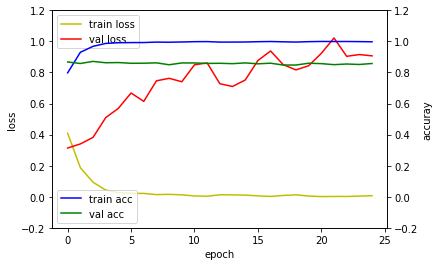

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [24]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)
# 한 번도 사용하지 않은 테스트 셋으로 모델의 성능을 측정합니다.

25000/25000 [==============================] - 14s 557us/step
## evaluation loss and_metrics ##
[1.0563311896133423, 0.8369599999809265]
